In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from PIL import Image
import os

In [3]:
device_name = tf.test.gpu_device_name()
if "GPU" not in device_name:
    print("GPU device not found")
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!unzip /content/drive/MyDrive/Horse2Zebra.zip

Archive:  /content/drive/MyDrive/Horse2Zebra.zip
  inflating: Horse2Zebra/metadata.csv  
   creating: Horse2Zebra/train/
   creating: Horse2Zebra/train/horse/
  inflating: Horse2Zebra/train/horse/n02381460_1001.jpg  
  inflating: Horse2Zebra/train/horse/n02381460_1002.jpg  
  inflating: Horse2Zebra/train/horse/n02381460_1003.jpg  
  inflating: Horse2Zebra/train/horse/n02381460_1006.jpg  
  inflating: Horse2Zebra/train/horse/n02381460_1008.jpg  
  inflating: Horse2Zebra/train/horse/n02381460_1009.jpg  
  inflating: Horse2Zebra/train/horse/n02381460_1011.jpg  
  inflating: Horse2Zebra/train/horse/n02381460_1014.jpg  
  inflating: Horse2Zebra/train/horse/n02381460_1019.jpg  
  inflating: Horse2Zebra/train/horse/n02381460_102.jpg  
  inflating: Horse2Zebra/train/horse/n02381460_1023.jpg  
  inflating: Horse2Zebra/train/horse/n02381460_1025.jpg  
  inflating: Horse2Zebra/train/horse/n02381460_1027.jpg  
  inflating: Horse2Zebra/train/horse/n02381460_1028.jpg  
  inflating: Horse2Zebra/train

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
base_dir = '/content/Horse2Zebra'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
train_horse_dir = os.path.join(train_dir, 'horse')
train_zebra_dir = os.path.join(train_dir, 'zebra')
validation_horse_dir = os.path.join(validation_dir, 'horse')
validation_zebra_dir = os.path.join(validation_dir, 'zebra')

In [8]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 224x224
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

Found 2401 images belonging to 2 classes.


In [9]:
# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='categorical')

Found 260 images belonging to 2 classes.


In [10]:
train_horse_fnames = os.listdir(train_horse_dir)
print(train_horse_fnames[:10])

train_zebra_fnames = os.listdir(train_zebra_dir)
train_zebra_fnames.sort()
print(train_zebra_fnames[:10])

['n02381460_2449.jpg', 'n02381460_778.jpg', 'n02381460_1319.jpg', 'n02381460_1204.jpg', 'n02381460_3393.jpg', 'n02381460_1793.jpg', 'n02381460_7033.jpg', 'n02381460_728.jpg', 'n02381460_2872.jpg', 'n02381460_3075.jpg']
['n02391049_10007.jpg', 'n02391049_10027.jpg', 'n02391049_1004.jpg', 'n02391049_10047.jpg', 'n02391049_10063.jpg', 'n02391049_101.jpg', 'n02391049_1012.jpg', 'n02391049_10122.jpg', 'n02391049_10123.jpg', 'n02391049_10129.jpg']


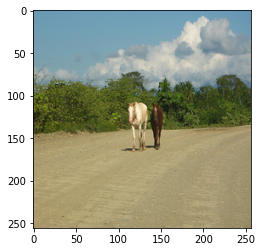

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.imshow(mpimg.imread(os.path.join(train_horse_dir, train_horse_fnames[10])))

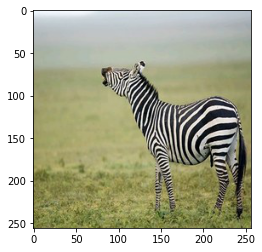

In [23]:
plt.imshow(mpimg.imread(os.path.join(train_zebra_dir, train_zebra_fnames[10])))

In [11]:
import tensorflow as tf
import numpy as np
import pathlib
import datetime

In [12]:
AlexNet = tf.keras.models.Sequential([
    # 1st conv
  tf.keras.layers.Conv2D(96, (11,11),strides=(4,4), activation='relu', input_shape=(224, 224, 3)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, strides=(2,2)),
    # 2nd conv
  tf.keras.layers.Conv2D(256, (11,11),strides=(1,1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
     # 3rd conv
  tf.keras.layers.Conv2D(384, (3,3),strides=(1,1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
    # 4th conv
  tf.keras.layers.Conv2D(384, (3,3),strides=(1,1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
    # 5th Conv
  tf.keras.layers.Conv2D(256, (3, 3), strides=(1, 1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, strides=(2, 2)),
  # To Flatten layer
  tf.keras.layers.Flatten(),
  # To FC layer 1
  tf.keras.layers.Dense(4096, activation='relu'),
    # add dropout 0.5 ==> tf.keras.layers.Dropout(0.5),
  #To FC layer 2
  tf.keras.layers.Dense(4096, activation='relu'),
    # add dropout 0.5 ==> tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(2, activation='softmax')
])
AlexNet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 54, 54, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       2973952   
                                                                 
 batch_normalization_1 (Batc  (None, 27, 27, 256)      1024      
 hNormalization)                                                 
                                                        

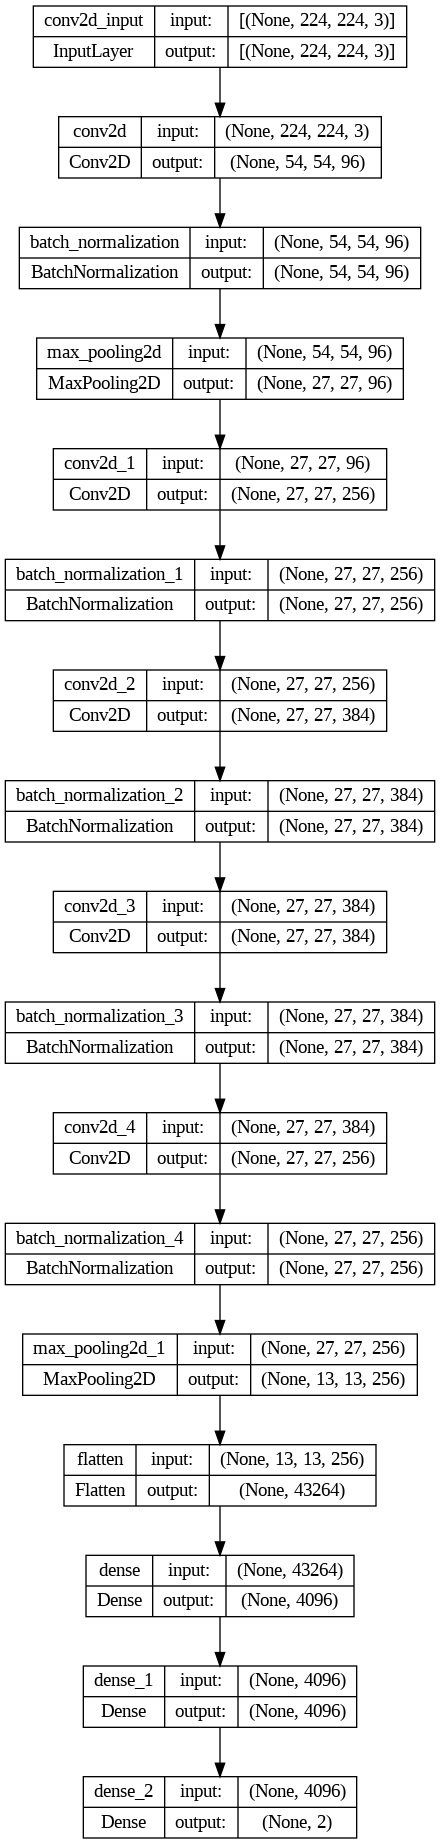

In [13]:
from tensorflow.keras.utils import plot_model
plot_model(AlexNet,  show_shapes=True, show_layer_names=True)

In [14]:
AlexNet.compile(optimizer='sgd', loss="categorical_crossentropy", metrics=['accuracy'])


In [15]:
from keras.callbacks import ModelCheckpoint
weightpath = "best_weights_9.hdf5"
checkpoint = ModelCheckpoint(weightpath, monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=True, mode='max')
callbacks_list = [checkpoint]

In [16]:
train_num = train_generator.samples
valid_num = validation_generator.samples
batch_size=250


In [17]:
history = AlexNet.fit_generator(train_generator,
                         steps_per_epoch=train_num//batch_size,
                         validation_data=validation_generator,
                         epochs=25,
                         validation_steps=valid_num//batch_size,
                         callbacks=callbacks_list)

<ipython-input-17-731e636ac145>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = AlexNet.fit_generator(train_generator,


Epoch 1/25
9/9 [==============================] - ETA: 0s - loss: 6.4605 - accuracy: 0.4611

9/9 [==============================] - 13s 168ms/step - loss: 6.4605 - accuracy: 0.4611 - val_loss: 3.8429 - val_accuracy: 0.5000
Epoch 2/25
9/9 [==============================] - ETA: 0s - loss: 1.3676 - accuracy: 0.5944

9/9 [==============================] - 1s 122ms/step - loss: 1.3676 - accuracy: 0.5944 - val_loss: 1.0626 - val_accuracy: 0.5500
Epoch 3/25
9/9 [==============================] - ETA: 0s - loss: 0.7698 - accuracy: 0.6556

9/9 [==============================] - 1s 125ms/step - loss: 0.7698 - accuracy: 0.6556 - val_loss: 1.2822 - val_accuracy: 0.5500
Epoch 4/25
9/9 [==============================] - ETA: 0s - loss: 0.8218 - accuracy: 0.6500

9/9 [==============================] - 1s 125ms/step - loss: 0.8218 - accuracy: 0.6500 - val_loss: 0.8606 - val_accuracy: 0.4000
Epoch 5/25
9/9 [==============================] - ETA: 0s - loss: 0.6894 - accuracy: 0.6944

9/9 [==============================] - 1s 152ms/step - loss: 0.6894 - accuracy: 0.6944 - val_loss: 0.7605 - val_accuracy: 0.5000
Epoch 6/25
9/9 [==============================] - ETA: 0s - loss: 0.5449 - accuracy: 0.7556

9/9 [==============================] - 1s 154ms/step - loss: 0.5449 - accuracy: 0.7556 - val_loss: 0.6779 - val_accuracy: 0.3500
Epoch 7/25
9/9 [==============================] - ETA: 0s - loss: 0.6573 - accuracy: 0.6944

9/9 [==============================] - 1s 143ms/step - loss: 0.6573 - accuracy: 0.6944 - val_loss: 0.8118 - val_accuracy: 0.4000
Epoch 8/25
9/9 [==============================] - ETA: 0s - loss: 0.7460 - accuracy: 0.7000

9/9 [==============================] - 1s 123ms/step - loss: 0.7460 - accuracy: 0.7000 - val_loss: 0.6454 - val_accuracy: 0.8000
Epoch 9/25
9/9 [==============================] - ETA: 0s - loss: 0.4278 - accuracy: 0.8333

9/9 [==============================] - 1s 121ms/step - loss: 0.4278 - accuracy: 0.8333 - val_loss: 0.6433 - val_accuracy: 0.6500
Epoch 10/25
9/9 [==============================] - ETA: 0s - loss: 0.4971 - accuracy: 0.7667

9/9 [==============================] - 1s 125ms/step - loss: 0.4971 - accuracy: 0.7667 - val_loss: 0.9099 - val_accuracy: 0.5000
Epoch 11/25
9/9 [==============================] - ETA: 0s - loss: 0.4855 - accuracy: 0.8000

9/9 [==============================] - 1s 124ms/step - loss: 0.4855 - accuracy: 0.8000 - val_loss: 0.8965 - val_accuracy: 0.4500
Epoch 12/25
9/9 [==============================] - ETA: 0s - loss: 0.4235 - accuracy: 0.8000

9/9 [==============================] - 1s 127ms/step - loss: 0.4235 - accuracy: 0.8000 - val_loss: 0.7100 - val_accuracy: 0.5500
Epoch 13/25
9/9 [==============================] - ETA: 0s - loss: 0.3679 - accuracy: 0.8333

9/9 [==============================] - 1s 161ms/step - loss: 0.3679 - accuracy: 0.8333 - val_loss: 0.9383 - val_accuracy: 0.4000
Epoch 14/25
9/9 [==============================] - ETA: 0s - loss: 0.3882 - accuracy: 0.8722

9/9 [==============================] - 1s 161ms/step - loss: 0.3882 - accuracy: 0.8722 - val_loss: 0.6971 - val_accuracy: 0.5000
Epoch 15/25
9/9 [==============================] - ETA: 0s - loss: 0.4208 - accuracy: 0.7889

9/9 [==============================] - 1s 154ms/step - loss: 0.4208 - accuracy: 0.7889 - val_loss: 1.5034 - val_accuracy: 0.3000
Epoch 16/25
9/9 [==============================] - ETA: 0s - loss: 0.3750 - accuracy: 0.8222

9/9 [==============================] - 1s 127ms/step - loss: 0.3750 - accuracy: 0.8222 - val_loss: 0.6646 - val_accuracy: 0.6500
Epoch 17/25
9/9 [==============================] - ETA: 0s - loss: 0.3067 - accuracy: 0.8833

9/9 [==============================] - 1s 124ms/step - loss: 0.3067 - accuracy: 0.8833 - val_loss: 0.7795 - val_accuracy: 0.6500
Epoch 18/25
9/9 [==============================] - ETA: 0s - loss: 0.3526 - accuracy: 0.8278

9/9 [==============================] - 1s 123ms/step - loss: 0.3526 - accuracy: 0.8278 - val_loss: 0.8239 - val_accuracy: 0.5000
Epoch 19/25
9/9 [==============================] - ETA: 0s - loss: 0.3092 - accuracy: 0.8500

9/9 [==============================] - 1s 128ms/step - loss: 0.3092 - accuracy: 0.8500 - val_loss: 0.5503 - val_accuracy: 0.7500
Epoch 20/25
9/9 [==============================] - ETA: 0s - loss: 0.3397 - accuracy: 0.8634

9/9 [==============================] - 2s 167ms/step - loss: 0.3397 - accuracy: 0.8634 - val_loss: 1.0329 - val_accuracy: 0.4500
Epoch 21/25
9/9 [==============================] - ETA: 0s - loss: 0.2871 - accuracy: 0.8667

9/9 [==============================] - 1s 125ms/step - loss: 0.2871 - accuracy: 0.8667 - val_loss: 0.5912 - val_accuracy: 0.6000
Epoch 22/25
9/9 [==============================] - ETA: 0s - loss: 0.3983 - accuracy: 0.8333

9/9 [==============================] - 1s 140ms/step - loss: 0.3983 - accuracy: 0.8333 - val_loss: 0.8055 - val_accuracy: 0.4500
Epoch 23/25
9/9 [==============================] - ETA: 0s - loss: 0.3243 - accuracy: 0.8722

9/9 [==============================] - 1s 147ms/step - loss: 0.3243 - accuracy: 0.8722 - val_loss: 0.4941 - val_accuracy: 0.7000
Epoch 24/25
9/9 [==============================] - ETA: 0s - loss: 0.3737 - accuracy: 0.8444

9/9 [==============================] - 1s 124ms/step - loss: 0.3737 - accuracy: 0.8444 - val_loss: 0.7209 - val_accuracy: 0.7000
Epoch 25/25
9/9 [==============================] - ETA: 0s - loss: 0.3876 - accuracy: 0.8333

9/9 [==============================] - 1s 128ms/step - loss: 0.3876 - accuracy: 0.8333 - val_loss: 0.6659 - val_accuracy: 0.6500


In [18]:
AlexNet.evaluate(validation_generator)

13/13 [==============================] - 1s 65ms/step - loss: 0.6172 - accuracy: 0.6692


[0.6172409057617188, 0.6692307591438293]

Q2. Train, test and report the performances using the following models on the Cats_and_Dogs_Dataset and Horse2Zebra dataset.

In [11]:
from keras.applications.vgg16 import VGG16
VGG= VGG16(input_shape=(224,224,3), weights='imagenet', include_top=False)
VGG.trainable = False #freeze the layers
VGG.summary()

58889256/58889256 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [20]:
import tensorflow as tf
vggmodel = tf.keras.Sequential([
    VGG,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6000, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])
vggmodel.summary()

vggmodel.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_3 (Dense)             (None, 6000)              150534000 
                                                                 
 dense_4 (Dense)             (None, 2)                 12002     
                                                                 
Total params: 165,260,690
Trainable params: 150,546,002
Non-trainable params: 14,714,688
_________________________________________________________________


In [21]:
vgghistory = vggmodel.fit(train_generator,epochs=20,validation_data=validation_generator)

Epoch 1/20
121/121 [==============================] - 22s 152ms/step - loss: 0.2404 - acc: 0.9217 - val_loss: 0.1398 - val_acc: 0.9308
Epoch 2/20
121/121 [==============================] - 17s 142ms/step - loss: 0.1206 - acc: 0.9613 - val_loss: 0.1826 - val_acc: 0.9385
Epoch 3/20
121/121 [==============================] - 18s 152ms/step - loss: 0.0933 - acc: 0.9708 - val_loss: 0.0924 - val_acc: 0.9692
Epoch 4/20
121/121 [==============================] - 21s 172ms/step - loss: 0.0352 - acc: 0.9858 - val_loss: 0.0962 - val_acc: 0.9808
Epoch 5/20
121/121 [==============================] - 17s 142ms/step - loss: 0.0079 - acc: 0.9979 - val_loss: 0.1003 - val_acc: 0.9731
Epoch 6/20
121/121 [==============================] - 18s 147ms/step - loss: 0.0022 - acc: 0.9996 - val_loss: 0.0871 - val_acc: 0.9731
Epoch 7/20
121/121 [==============================] - 19s 157ms/step - loss: 7.6492e-04 - acc: 1.0000 - val_loss: 0.0821 - val_acc: 0.9769
Epoch 8/20
121/121 [==============================]

In [22]:
vggmodel.evaluate(validation_generator)

13/13 [==============================] - 2s 110ms/step - loss: 0.1066 - acc: 0.9692


[0.10656629502773285, 0.9692307710647583]

In [12]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
inception = InceptionV3(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet')
for layer in inception.layers:
    layer.trainable = False
inception.summary()

87910968/87910968 [==============================] - 5s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)           

In [13]:
add_model = tf.keras.Sequential()
add_model.add(inception)
add_model.add(tf.keras.layers.GlobalAveragePooling2D())
add_model.add(tf.keras.layers.Dropout(0.5))
add_model.add(tf.keras.layers.Flatten())
add_model.add(tf.keras.layers.Dense(60000,activation='relu'))
add_model.add(tf.keras.layers.Dense(2,activation='softmax'))
add_model.summary()
add_model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 60000)             122940000 
                                                                 
 dense_1 (Dense)             (None, 2)                 120002    
                                                        

In [14]:
inceptionhistory = add_model.fit(train_generator,epochs=20,validation_data=validation_generator)

Epoch 1/20
121/121 [==============================] - 29s 115ms/step - loss: 0.1067 - acc: 0.9758 - val_loss: 0.2593 - val_acc: 0.9808
Epoch 2/20
121/121 [==============================] - 13s 103ms/step - loss: 0.1268 - acc: 0.9792 - val_loss: 0.1319 - val_acc: 0.9846
Epoch 3/20
121/121 [==============================] - 13s 104ms/step - loss: 0.0419 - acc: 0.9904 - val_loss: 0.1355 - val_acc: 0.9846
Epoch 4/20
121/121 [==============================] - 13s 105ms/step - loss: 0.0099 - acc: 0.9963 - val_loss: 0.0775 - val_acc: 0.9846
Epoch 5/20
121/121 [==============================] - 13s 104ms/step - loss: 0.0325 - acc: 0.9929 - val_loss: 0.1102 - val_acc: 0.9885
Epoch 6/20
121/121 [==============================] - 12s 102ms/step - loss: 0.0174 - acc: 0.9942 - val_loss: 0.1534 - val_acc: 0.9846
Epoch 7/20
121/121 [==============================] - 13s 104ms/step - loss: 0.0257 - acc: 0.9917 - val_loss: 0.0840 - val_acc: 0.9846
Epoch 8/20
121/121 [==============================] - 1

In [15]:
add_model.evaluate(validation_generator)

13/13 [==============================] - 1s 76ms/step - loss: 0.0493 - acc: 0.9846


[0.04926479980349541, 0.9846153855323792]

In [16]:
import tensorflow as tf
inceptionmodel = tf.keras.Sequential(inception)
inceptionmodel.add(tf.keras.layers.Flatten())
inceptionmodel.add(tf.keras.layers.Dense(4000, activation='relu'))
inceptionmodel.add(tf.keras.layers.Dense(2, activation='softmax'))
inceptionmodel.summary()

inceptionmodel.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_1 (Flatten)         (None, 51200)             0         
                                                                 
 dense_2 (Dense)             (None, 4000)              204804000 
                                                                 
 dense_3 (Dense)             (None, 2)                 8002      
                                                                 
Total params: 226,614,786
Trainable params: 204,812,002
Non-trainable params: 21,802,784
_________________________________________________________________


In [17]:
inceptionhistory = inceptionmodel.fit(train_generator,epochs=20,validation_data=validation_generator)

Epoch 1/20
121/121 [==============================] - 22s 135ms/step - loss: 0.6194 - acc: 0.9679 - val_loss: 1.2018 - val_acc: 0.9077
Epoch 2/20
121/121 [==============================] - 12s 101ms/step - loss: 0.2178 - acc: 0.9854 - val_loss: 0.6176 - val_acc: 0.9885
Epoch 3/20
121/121 [==============================] - 12s 103ms/step - loss: 0.0803 - acc: 0.9938 - val_loss: 0.7227 - val_acc: 0.9846
Epoch 4/20
121/121 [==============================] - 13s 104ms/step - loss: 0.0154 - acc: 0.9988 - val_loss: 0.7322 - val_acc: 0.9846
Epoch 5/20
121/121 [==============================] - 13s 103ms/step - loss: 3.6579e-06 - acc: 1.0000 - val_loss: 0.7273 - val_acc: 0.9846
Epoch 6/20
121/121 [==============================] - 13s 103ms/step - loss: 1.5512e-06 - acc: 1.0000 - val_loss: 0.7239 - val_acc: 0.9846
Epoch 7/20
121/121 [==============================] - 13s 104ms/step - loss: 1.0247e-06 - acc: 1.0000 - val_loss: 0.7213 - val_acc: 0.9846
Epoch 8/20
121/121 [=======================

In [18]:
inceptionmodel.evaluate(validation_generator)

13/13 [==============================] - 1s 75ms/step - loss: 0.7054 - acc: 0.9846


[0.7054111957550049, 0.9846153855323792]

In [30]:
from tensorflow.keras.applications import ResNet50
ResNet50 = ResNet50(input_shape=(224, 224,3), include_top=False, weights="imagenet")
for layer in ResNet50.layers:
    layer.trainable = False
ResNet50.summary()

94765736/94765736 [==============================] - 6s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                          

In [31]:
resnetmodel = tf.keras.Sequential()
resnetmodel.add(ResNet50)
resnetmodel.add(tf.keras.layers.GlobalAveragePooling2D())
resnetmodel.add(tf.keras.layers.Flatten())
resnetmodel.add(tf.keras.layers.Dropout(0.5))
resnetmodel.add(tf.keras.layers.Dense(6000,activation='relu'))
resnetmodel.add(tf.keras.layers.Dense(2,activation='softmax'))
resnetmodel.summary()
resnetmodel.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 flatten_3 (Flatten)         (None, 2048)              0         
                                                                 
 dropout_1 (Dropout)         (None, 2048)              0         
                                                                 
 dense_8 (Dense)             (None, 6000)              12294000  
                                                                 
 dense_9 (Dense)             (None, 2)                 12002     
                                                      

In [32]:
resnetmodel.fit(train_generator,epochs=20,validation_data=validation_generator)

Epoch 1/20
121/121 [==============================] - 17s 103ms/step - loss: 0.6923 - acc: 0.5573 - val_loss: 0.6919 - val_acc: 0.5385
Epoch 2/20
121/121 [==============================] - 12s 95ms/step - loss: 0.6905 - acc: 0.5556 - val_loss: 0.6906 - val_acc: 0.5385
Epoch 3/20
121/121 [==============================] - 11s 94ms/step - loss: 0.6887 - acc: 0.5556 - val_loss: 0.6889 - val_acc: 0.5385
Epoch 4/20
121/121 [==============================] - 12s 101ms/step - loss: 0.6857 - acc: 0.5556 - val_loss: 0.6855 - val_acc: 0.5385
Epoch 5/20
121/121 [==============================] - 12s 95ms/step - loss: 0.6815 - acc: 0.5573 - val_loss: 0.6776 - val_acc: 0.5385
Epoch 6/20
121/121 [==============================] - 12s 95ms/step - loss: 0.6734 - acc: 0.6052 - val_loss: 0.6675 - val_acc: 0.5692
Epoch 7/20
121/121 [==============================] - 12s 102ms/step - loss: 0.6663 - acc: 0.6372 - val_loss: 0.6597 - val_acc: 0.7269
Epoch 8/20
121/121 [==============================] - 13s 1

In [33]:
!pip install -U efficientnet


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 KB 5.5 MB/s eta 0:00:00


In [34]:
import efficientnet.keras as efn
efficient50 = efn.EfficientNetB0(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet')
for layer in efficient50.layers:
    layer.trainable = False
efficient50.summary()

16804768/16804768 [==============================] - 5s 0us/step
Model: "efficientnet-b0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 stem_conv (Conv2D)             (None, 112, 112, 32  864         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 stem_bn (BatchNormalization)   (None, 112, 112, 32  128         ['stem_conv[0][0]']              
                   

In [35]:
efficient50_model = tf.keras.Sequential()
efficient50_model.add(efficient50)
efficient50_model.add(tf.keras.layers.GlobalAveragePooling2D())
efficient50_model.add(tf.keras.layers.Flatten())
efficient50_model.add(tf.keras.layers.Dropout(0.5))
efficient50_model.add(tf.keras.layers.Dense(6000,activation='relu'))
efficient50_model.add(tf.keras.layers.Dense(2,activation='softmax'))
efficient50_model.summary()
efficient50_model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnet-b0 (Functional  (None, 7, 7, 1280)       4049564   
 )                                                               
                                                                 
 global_average_pooling2d_2   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 flatten_4 (Flatten)         (None, 1280)              0         
                                                                 
 dropout_2 (Dropout)         (None, 1280)              0         
                                                                 
 dense_10 (Dense)            (None, 6000)              7686000   
                                                                 
 dense_11 (Dense)            (None, 2)                

In [36]:
efficient50_model.fit(train_generator,epochs=20,validation_data=validation_generator)

Epoch 1/20
121/121 [==============================] - 31s 164ms/step - loss: 0.6901 - acc: 0.5544 - val_loss: 0.6851 - val_acc: 0.5385
Epoch 2/20
121/121 [==============================] - 11s 88ms/step - loss: 0.6738 - acc: 0.7997 - val_loss: 0.6584 - val_acc: 0.9692
Epoch 3/20
121/121 [==============================] - 9s 77ms/step - loss: 0.6403 - acc: 0.9788 - val_loss: 0.6200 - val_acc: 0.9808
Epoch 4/20
121/121 [==============================] - 10s 85ms/step - loss: 0.6023 - acc: 0.9779 - val_loss: 0.5835 - val_acc: 0.9808
Epoch 5/20
121/121 [==============================] - 10s 85ms/step - loss: 0.5692 - acc: 0.9808 - val_loss: 0.5559 - val_acc: 0.9769
Epoch 6/20
121/121 [==============================] - 11s 93ms/step - loss: 0.5463 - acc: 0.9792 - val_loss: 0.5370 - val_acc: 0.9769
Epoch 7/20
121/121 [==============================] - 10s 85ms/step - loss: 0.5285 - acc: 0.9804 - val_loss: 0.5216 - val_acc: 0.9769
Epoch 8/20
121/121 [==============================] - 11s 87ms

In [37]:
efficient50_model.evaluate(validation_generator)

13/13 [==============================] - 1s 96ms/step - loss: 0.4040 - acc: 0.9769


[0.40400272607803345, 0.9769230484962463]

In [38]:
from tensorflow.keras.applications import MobileNetV2
Mobil=MobileNetV2( weights='imagenet',include_top=False,input_shape=(224,224,3))
for layer in Mobil.layers:
    layer.trainable = False
Mobil.summary()

9406464/9406464 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                

In [39]:
Mobil_model = tf.keras.Sequential()
Mobil_model.add(Mobil)
Mobil_model.add(tf.keras.layers.GlobalAveragePooling2D())
Mobil_model.add(tf.keras.layers.Flatten())
Mobil_model.add(tf.keras.layers.Dropout(0.5))
Mobil_model.add(tf.keras.layers.Dense(6000,activation='relu'))
Mobil_model.add(tf.keras.layers.Dense(2,activation='softmax'))
Mobil_model.summary()
Mobil_model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_3   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 flatten_5 (Flatten)         (None, 1280)              0         
                                                                 
 dropout_3 (Dropout)         (None, 1280)              0         
                                                                 
 dense_12 (Dense)            (None, 6000)              7686000   
                                                                 
 dense_13 (Dense)            (None, 2)                

In [40]:
Mobil_model.fit(train_generator,epochs=20,validation_data=validation_generator)

Epoch 1/20
121/121 [==============================] - 15s 91ms/step - loss: 0.6858 - acc: 0.7726 - val_loss: 0.6711 - val_acc: 0.9808
Epoch 2/20
121/121 [==============================] - 10s 83ms/step - loss: 0.6507 - acc: 0.9846 - val_loss: 0.6320 - val_acc: 0.9846
Epoch 3/20
121/121 [==============================] - 9s 77ms/step - loss: 0.6149 - acc: 0.9850 - val_loss: 0.6002 - val_acc: 0.9846
Epoch 4/20
121/121 [==============================] - 9s 76ms/step - loss: 0.5888 - acc: 0.9879 - val_loss: 0.5786 - val_acc: 0.9846
Epoch 5/20
121/121 [==============================] - 11s 94ms/step - loss: 0.5693 - acc: 0.9883 - val_loss: 0.5624 - val_acc: 0.9846
Epoch 6/20
121/121 [==============================] - 10s 83ms/step - loss: 0.5547 - acc: 0.9888 - val_loss: 0.5491 - val_acc: 0.9846
Epoch 7/20
121/121 [==============================] - 9s 76ms/step - loss: 0.5412 - acc: 0.9917 - val_loss: 0.5373 - val_acc: 0.9846
Epoch 8/20
121/121 [==============================] - 9s 77ms/ste

In [41]:
Mobil_model.evaluate(validation_generator)

13/13 [==============================] - 1s 68ms/step - loss: 0.4246 - acc: 0.9846


[0.4246339499950409, 0.9846153855323792]